In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = sqlite3.connect("/content/lahman_1871-2022.sqlite")
cursor = conn.cursor()

In [3]:
# sample query for team salary. (Group up by teamID instead of lgID.)
salary_query = ("SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID")
team_salaries = pd.read_sql(salary_query, conn)
team_salaries

,yearID,teamID,total_payroll
0,1985,ATL,14807000.0
1,1985,BAL,11560712.0
2,1985,BOS,10897560.0
3,1985,CAL,14427894.0
4,1985,CHA,9846178.0
...,...,...,...
913,2016,SLN,143053500.0
914,2016,TBA,57097310.0
915,2016,TEX,176038723.0
916,2016,TOR,138701700.0


In [4]:
# check all the tales in database.
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()
for table in tables:
    print(table[0])

AllstarFull
Appearances
AwardsManagers
AwardsPlayers
AwardsShareManagers
AwardsSharePlayers
Batting
BattingPost
CollegePlaying
Fielding
FieldingOF
FieldingOFsplit
FieldingPost
HallOfFame
HomeGames
Managers
ManagersHalf
Parks
People
Pitching
PitchingPost
Salaries
Schools
SeriesPost
Teams
TeamsFranchises
TeamsHalf


**Part 1: Wrangling**

Retrieve data from Salaries and Teams tables.

In [5]:
# print out the whole Salaries table, examine it in pandas dataframe form.
salary_table_query =  "SELECT * FROM Salaries"

salary_df = pd.read_sql(salary_table_query, conn)
salary_df

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000.0
1,1985,ATL,NL,bedrost01,550000.0
2,1985,ATL,NL,benedbr01,545000.0
3,1985,ATL,NL,campri01,633333.0
4,1985,ATL,NL,ceronri01,625000.0
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000.0
26424,2016,WAS,NL,taylomi02,524000.0
26425,2016,WAS,NL,treinbl01,524900.0
26426,2016,WAS,NL,werthja01,21733615.0


In [6]:
# check if there is any missing data in salary dataframe. (No missing data as it is shown below.)
salary_df.isna().sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

In [7]:
# print out the whole Teams table, examine it in pandas dataframe form.
teams_table_query = "SELECT * FROM Teams"
teams_df = pd.read_sql(teams_table_query, conn)
teams_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NA,BS1,BNA,None,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NA,CH1,CNA,None,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NA,CL1,CFC,None,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NA,FW1,KEK,None,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NA,NY2,NNA,None,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,2022,NL,PIT,PIT,C,5,162,81.0,62,100,...,152,0.979,Pittsburgh Pirates,PNC Park,1257458.0,100,102,PIT,PIT,PIT
3011,2022,NL,SDN,SDP,W,2,162,81.0,89,73,...,116,0.987,San Diego Padres,Petco Park,2987470.0,92,92,SDP,SDN,SDN
3012,2022,NL,SFN,SFG,W,3,162,81.0,81,81,...,130,0.983,San Francisco Giants,Oracle Park,2482686.0,99,99,SFG,SFN,SFN
3013,2022,NL,SLN,STL,C,1,162,81.0,93,69,...,181,0.989,St. Louis Cardinals,Busch Stadium III,3320551.0,94,94,STL,SLN,SLN


In [8]:
# check if there is any missing data in team dataframe.
teams_df.isna().sum()

yearID               0
lgID                 0
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                  16
SB                 125
CS                 831
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

**Problem 1:**

Using SQL compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).

Include the SQL code you used to create this relation in your writeup. Describe how you dealt with any missing data in these two relations. Specifically, indicate if there is missing data in either table, and how the type of join you used determines how you dealt with this missing data. One note, for SQL you have to be mindful of integer vs. float division.

In [9]:
# Merge Salaries and Teams tables, using Inner join method (left join works the same in this case),
# Only keep the valid data which has no N/A or NULL values.
# Merge them on yearID and teamID on the basis of Salaries table, in order to keep the salary information
# as well as the years we will need for future analysis.
merge_query = """SELECT Salaries.yearID, Salaries.teamID, SUM(Salaries.salary) as total_payroll, Teams.franchID, Teams.G as num_games, Teams.W as num_wins, (SUM(Teams.W)*1.0 / SUM(Teams.G)*100.0) as winning_percentage
    FROM Salaries
    INNER JOIN Teams ON Salaries.teamID = Teams.teamID AND Salaries.yearID = Teams.yearID
    GROUP BY Salaries.yearID, Salaries.teamID
    """
merge_df = pd.read_sql(merge_query, conn)
# conn.close()
merge_df

,yearID,teamID,total_payroll,franchID,num_games,num_wins,winning_percentage
0,1985,ATL,14807000.0,ATL,162,66,40.740741
1,1985,BAL,11560712.0,BAL,161,83,51.552795
2,1985,BOS,10897560.0,BOS,163,81,49.693252
3,1985,CAL,14427894.0,ANA,162,90,55.555556
4,1985,CHA,9846178.0,CHW,163,85,52.147239
...,...,...,...,...,...,...,...
913,2016,SLN,143053500.0,STL,162,86,53.086420
914,2016,TBA,57097310.0,TBD,162,68,41.975309
915,2016,TEX,176038723.0,TEX,162,95,58.641975
916,2016,TOR,138701700.0,TOR,162,89,54.938272


In [10]:
# check if merged dataframe has any missing data.
# because we merged them on the basis of Salaries table, there is no missing data.
merge_df.isna().sum()

yearID                0
teamID                0
total_payroll         0
franchID              0
num_games             0
num_wins              0
winning_percentage    0
dtype: int64

**Part 2:**

Exploratory Data Analysis

Payroll Distribution

Problem 2

Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2022).



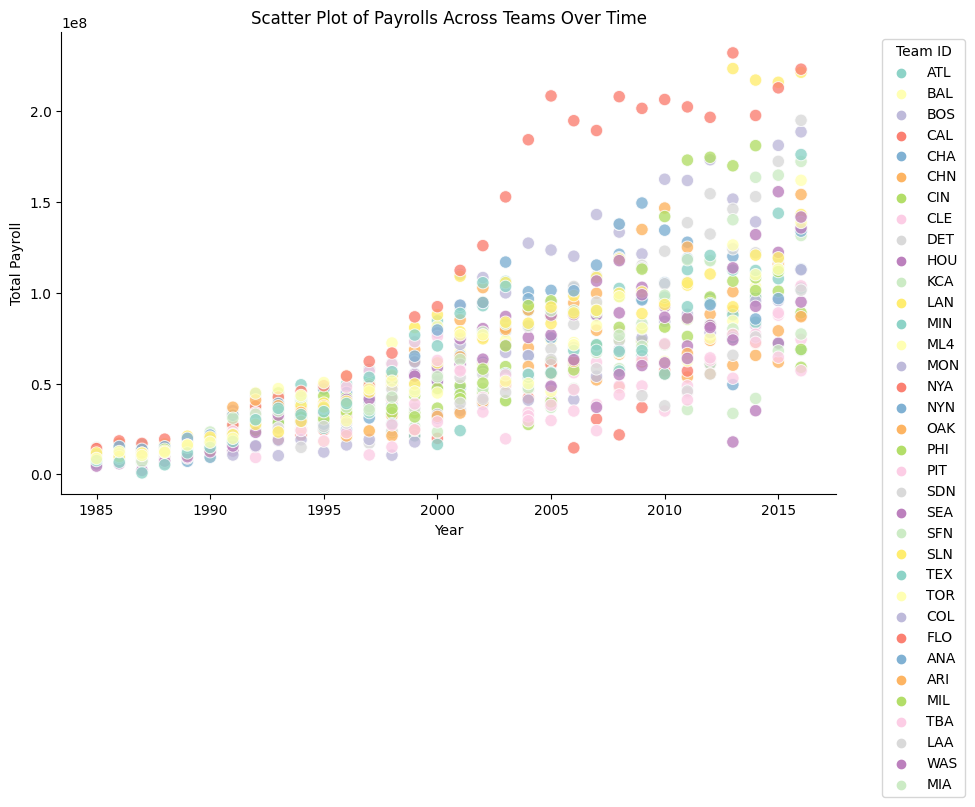

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge_df, x='yearID', y='total_payroll', hue='teamID', palette='Set3', s=80, alpha=0.8)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.title('Scatter Plot of Payrolls Across Teams Over Time')

# Show legend
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Question 1:**

*What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, etc.*

Over the period from 1985 to 2016, the total payroll across all teams has exhibited a general upward trend, indicating a continuous growth in financial investment within the baseball industry. This growth suggests an increasing commitment to player salaries and team expenditures. However, it is noteworthy that there exists a considerable spread or disparity in total payrolls among different teams. The pay gap signifies significant variations in financial resources allocated by different franchises, with some teams consistently investing more in player salaries than others. This variance in financial commitment underscores the diversity in economic capacities and strategic approaches among baseball teams, contributing to a notable discrepancy in total payroll distribution within the league.

Problem 3

*Write code to produce plots that specifically show at least one of the statements you made in Question 1. For example, if you make a statement that there is a trend for payrolls to decrease over time, make a plot of a statistic for central tendency (e.g., mean payroll) vs. time to show that specficially.*

Boxplot showing a trend for payrolls to increase over time. Variances are getting larger as well.

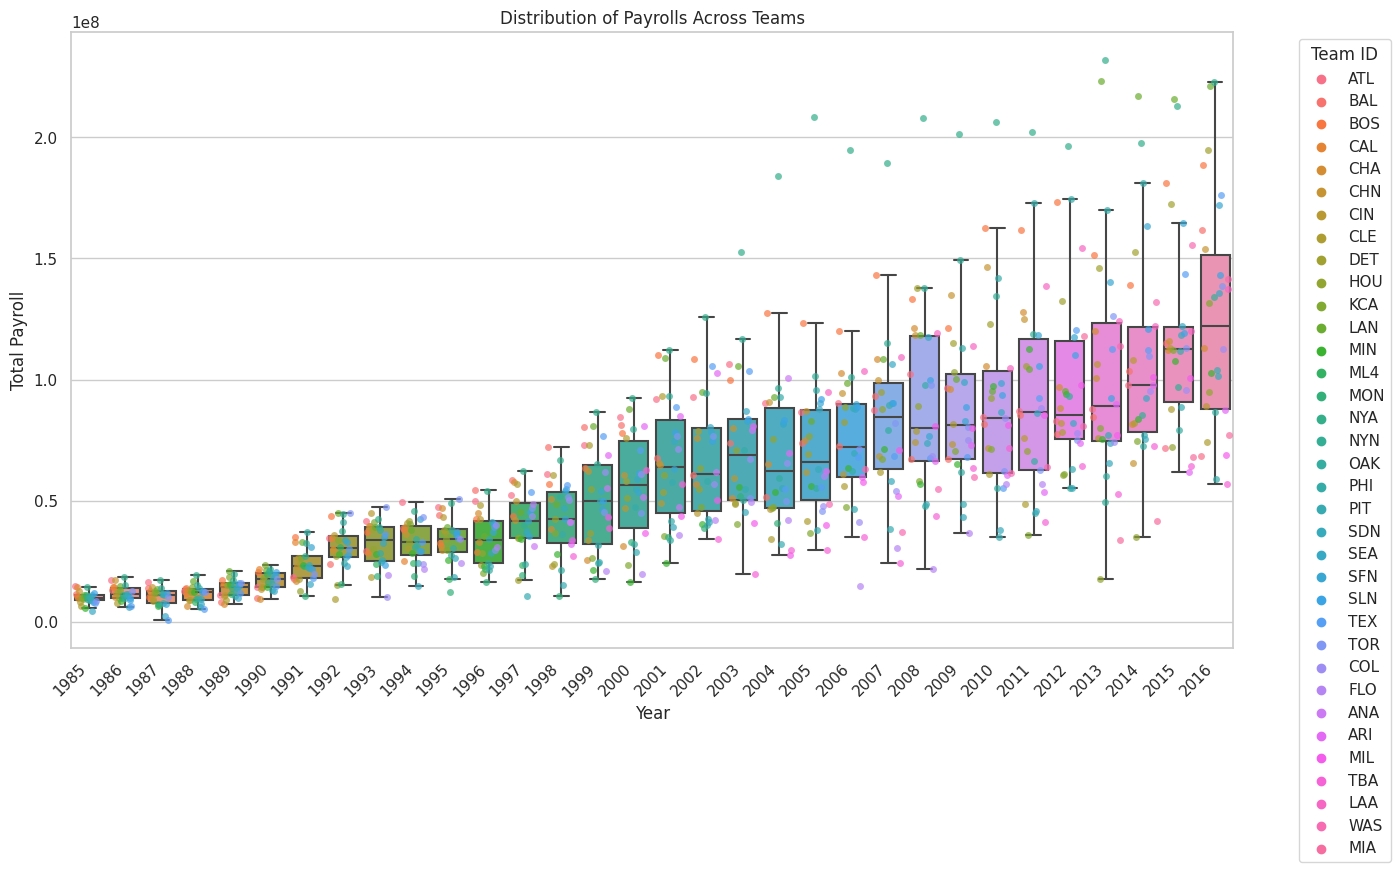

In [12]:
sns.set(style="whitegrid")

# Create a box plot using seaborn with teamID labels
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="yearID", y="total_payroll", data=merge_df, showfliers=False)
sns.swarmplot(x="yearID", y="total_payroll", hue="teamID", data=merge_df, dodge=True, marker="o", alpha=0.7)

plt.title('Distribution of Payrolls Across Teams')
plt.xlabel('Year')
plt.ylabel('Total Payroll')

# Rotate the year labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team ID')

plt.show()

**Correlation between payroll and winning**

Problem 4

Write code to discretize year into five time periods (you can use pandas.cut to accomplish this) and then make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods. You could add a regression line (using, e.g., NumPy's polyfit) in each scatter plot to ease interpretation.

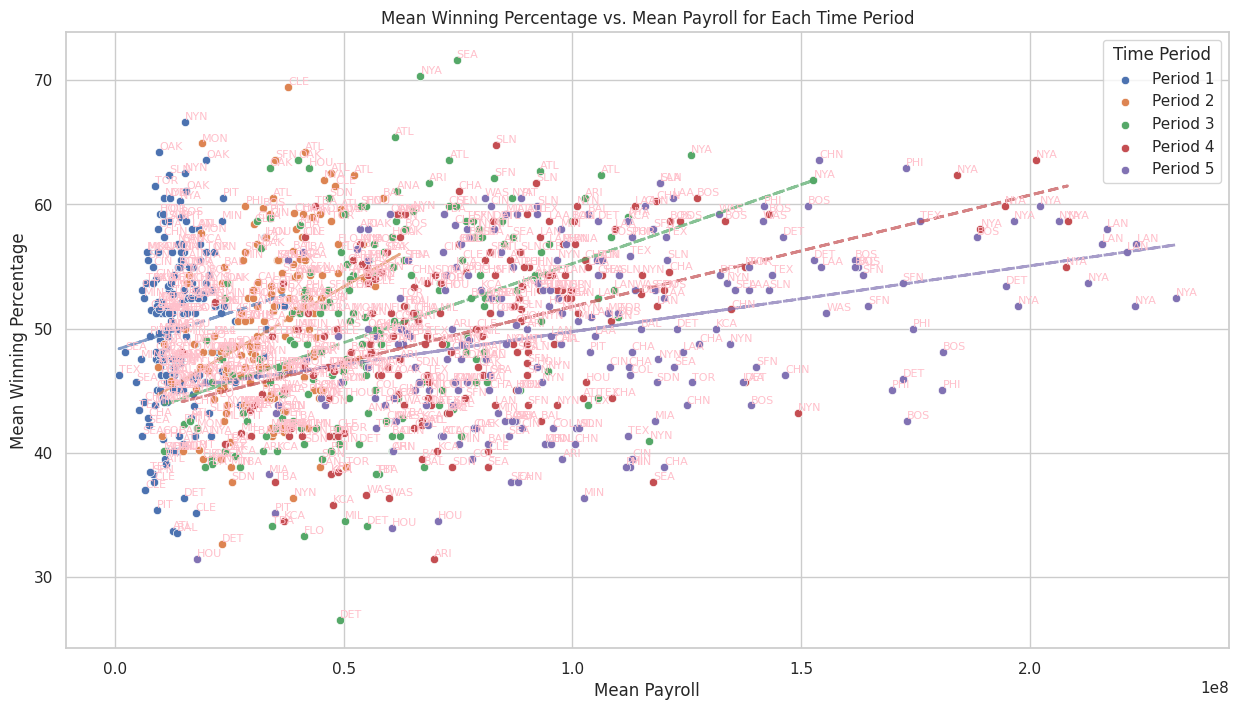

In [13]:
# Discretize 'yearID' into five time periods
merge_df['time_period'] = pd.cut(merge_df['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])

# Calculate mean winning percentage and mean payroll for each time period
mean_stats = merge_df.groupby('time_period').agg({'winning_percentage': 'mean', 'total_payroll': 'mean'}).reset_index()

# Set the style for seaborn
sns.set(style="whitegrid")

# Create scatter plots for each time period
plt.figure(figsize=(15, 8))
for period in mean_stats['time_period']:
    subset = merge_df[merge_df['time_period'] == period]
    x = subset['total_payroll']
    y = subset['winning_percentage']
    team_ids = subset['teamID']

    # Fit a regression line using NumPy's polyfit
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = np.polyval([slope, intercept], x)

    # Plot scatter plot
    sns.scatterplot(x=x, y=y, label=period)

    # Plot regression line
    plt.plot(x, regression_line, linestyle='--', linewidth=2, alpha=0.7)
    for i, team_id in enumerate(team_ids):
        plt.text(x.iloc[i], y.iloc[i], team_id, fontsize=8, ha='left', va='bottom', color='#FFC0CB')
plt.title('Mean Winning Percentage vs. Mean Payroll for Each Time Period')
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning Percentage')
plt.legend(title='Time Period')

plt.show()


**Question 2:**

*What can you say about team payrolls across these periods? Are there any teams that standout as being particularly good at paying for wins across these time periods? What can you say about the Oakland A's spending efficiency across these time periods (labeling points in the scatterplot can help interpretation).*

In the first period, the mean payroll did not distinctly differentiate teams, as evidenced by a wide spread in mean winning percentages along the y-axis, indicating that financial investment alone did not necessarily correlate with on-field success.

Moving to period 3, notable teams such as SEA, NYA, and ATL demonstrated exceptional game performance, with their mean winning percentages significantly surpassing other teams. NYA payroll is higher than other teams in terms of on-fild performance.

However, in periods 4 and 5, teams like NYA and LAN emerged as standout performers as they pretty much dominate winning percentage that above 50% and high payroll. This shift indicates a trend towards recognizing and compensating players for their contributions to team success. The strategic investment in high-performing players during these periods may have contributed to the notable success of these teams on the field.

Overall, the evolving dynamics in payroll and performance during these five periods highlight the complex interplay between financial investment, player performance, and team success in the baseball landscape.

**Part 3: Data transformations**

**Standardizing across years**

Problem 5

In [14]:
# Calculate average and standard deviation of payroll for each year
merge_df['avg_payroll'] = merge_df.groupby('yearID')['total_payroll'].transform('mean')
merge_df['std_payroll'] = merge_df.groupby('yearID')['total_payroll'].transform('std')

# Create a new variable 'standardized_payroll'
merge_df['standardized_payroll'] = (merge_df['total_payroll'] - merge_df['avg_payroll']) / merge_df['std_payroll']

# Display the updated DataFrame
merge_df

,yearID,teamID,total_payroll,franchID,num_games,num_wins,winning_percentage,time_period,avg_payroll,std_payroll,standardized_payroll
0,1985,ATL,14807000.0,ATL,162,66,40.740741,Period 1,1.007557e+07,2.470845e+06,1.914905
1,1985,BAL,11560712.0,BAL,161,83,51.552795,Period 1,1.007557e+07,2.470845e+06,0.601068
2,1985,BOS,10897560.0,BOS,163,81,49.693252,Period 1,1.007557e+07,2.470845e+06,0.332678
3,1985,CAL,14427894.0,ANA,162,90,55.555556,Period 1,1.007557e+07,2.470845e+06,1.761474
4,1985,CHA,9846178.0,CHW,163,85,52.147239,Period 1,1.007557e+07,2.470845e+06,-0.092838
...,...,...,...,...,...,...,...,...,...,...,...
913,2016,SLN,143053500.0,STL,162,86,53.086420,Period 5,1.250046e+08,4.663199e+07,0.387050
914,2016,TBA,57097310.0,TBD,162,68,41.975309,Period 5,1.250046e+08,4.663199e+07,-1.456238
915,2016,TEX,176038723.0,TEX,162,95,58.641975,Period 5,1.250046e+08,4.663199e+07,1.094402
916,2016,TOR,138701700.0,TOR,162,89,54.938272,Period 5,1.250046e+08,4.663199e+07,0.293728


Problem 6

Repeat the same plots as Problem 4, but use this new standardized payroll variable.

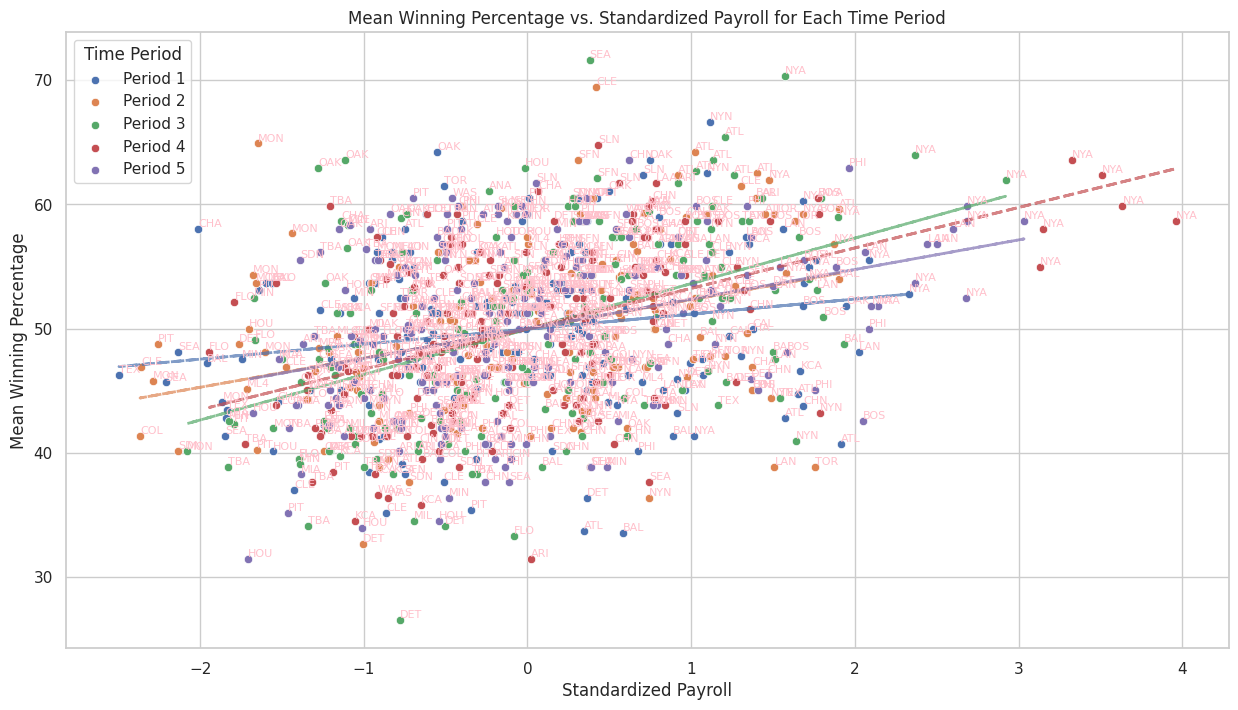

In [15]:
# Discretize 'yearID' into five time periods
merge_df['time_period'] = pd.cut(merge_df['yearID'], bins=5, labels=['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'])

# Calculate mean winning percentage and mean payroll for each time period
mean_stats = merge_df.groupby('time_period').agg({'winning_percentage': 'mean', 'standardized_payroll': 'mean'}).reset_index()

# Set the style for seaborn
sns.set(style="whitegrid")

# Create scatter plots for each time period
plt.figure(figsize=(15, 8))
for period in mean_stats['time_period']:
    subset = merge_df[merge_df['time_period'] == period]
    x = subset['standardized_payroll']
    y = subset['winning_percentage']
    team_ids = subset['teamID']

    # Fit a regression line using NumPy's polyfit
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = np.polyval([slope, intercept], x)

    # Plot scatter plot
    sns.scatterplot(x=x, y=y, label=period)

    # Plot regression line
    plt.plot(x, regression_line, linestyle='--', linewidth=2, alpha=0.7)
    for i, team_id in enumerate(team_ids):
        plt.text(x.iloc[i], y.iloc[i], team_id, fontsize=8, ha='left', va='bottom', color='#FFC0CB')
plt.title('Mean Winning Percentage vs. Standardized Payroll for Each Time Period')
plt.xlabel('Standardized Payroll')
plt.ylabel('Mean Winning Percentage')
plt.legend(title='Time Period')

plt.show()

**Question 3**

*Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.*

Standardizing the total payroll can provide insights into how teams' payroll levels deviate from the average within each year, removing the scale differences caused by variations in payroll across different periods. When comparing the scatter plot of mean winning percentage vs. mean standardized payroll to the original graph related to the five period times, I observed:



1.   Elimination of Scale Effects: The standardized payroll values have a mean of 0 and standard deviation of 1 within each year. This eliminates the scale effects caused by differences in the absolute magnitude of payrolls across years. NYA in period 4 stands out as spending the most for the players that winning percentage is higher than 50%. The regression line is relatively flat for period 1 indicates that during that time, the corelation between spending and winning percentage is lower than other periods.
2.   Identification of Over/Under-Performance: Teams with standardized payroll values above 0 are spending above the average for their year, while teams with values below 0 are spending below the average. This allows for the identification of over-performing or under-performing teams relative to their financial investment.



**Expected wins**

Problem 7

*Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). Add a regression line to highlight the relationship.*

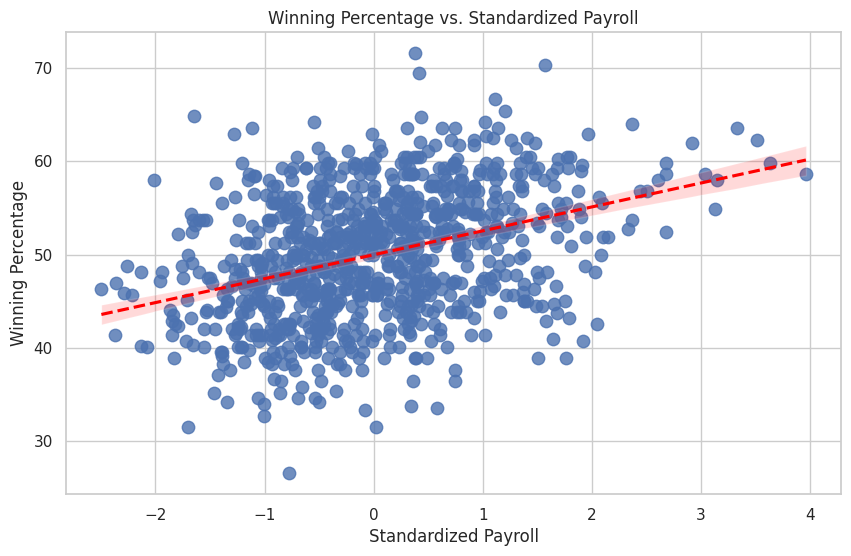

In [16]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='standardized_payroll', y='winning_percentage', data=merge_df, scatter_kws={'s': 80, 'alpha': 0.8}, line_kws={'color': 'red', 'linestyle': '--'})

# Add labels and title
plt.title('Winning Percentage vs. Standardized Payroll')
plt.xlabel('Standardized Payroll')
plt.ylabel('Winning Percentage')

# Show the plot
plt.show()

**Spending efficiency**

Using this result, we can now create a single plot that makes it easier to compare teams efficiency. The idea is to create a new measurement unit for each team based on their winning percentage and their expected winning percentage that we can plot across time summarizing how efficient each team is in their spending.

In [17]:
# Calculate expected win percentage
merge_df['expected_win_pct'] = 50 + 2.5 * merge_df['standardized_payroll']

merge_df

,yearID,teamID,total_payroll,franchID,num_games,num_wins,winning_percentage,time_period,avg_payroll,std_payroll,standardized_payroll,expected_win_pct
0,1985,ATL,14807000.0,ATL,162,66,40.740741,Period 1,1.007557e+07,2.470845e+06,1.914905,54.787263
1,1985,BAL,11560712.0,BAL,161,83,51.552795,Period 1,1.007557e+07,2.470845e+06,0.601068,51.502671
2,1985,BOS,10897560.0,BOS,163,81,49.693252,Period 1,1.007557e+07,2.470845e+06,0.332678,50.831694
3,1985,CAL,14427894.0,ANA,162,90,55.555556,Period 1,1.007557e+07,2.470845e+06,1.761474,54.403684
4,1985,CHA,9846178.0,CHW,163,85,52.147239,Period 1,1.007557e+07,2.470845e+06,-0.092838,49.767906
...,...,...,...,...,...,...,...,...,...,...,...,...
913,2016,SLN,143053500.0,STL,162,86,53.086420,Period 5,1.250046e+08,4.663199e+07,0.387050,50.967625
914,2016,TBA,57097310.0,TBD,162,68,41.975309,Period 5,1.250046e+08,4.663199e+07,-1.456238,46.359406
915,2016,TEX,176038723.0,TEX,162,95,58.641975,Period 5,1.250046e+08,4.663199e+07,1.094402,52.736005
916,2016,TOR,138701700.0,TOR,162,89,54.938272,Period 5,1.250046e+08,4.663199e+07,0.293728,50.734320


**Problem 8**

*Create a new field to compute each team's spending effiency*

*Make a line plot with year on the x-axis and efficiency on the y-axis. A good set of teams to plot are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA).*

In [18]:
# Calculate spending efficiency
merge_df['efficiency'] = merge_df['winning_percentage'] - merge_df['expected_win_pct']

merge_df[['yearID', 'teamID', 'total_payroll', 'winning_percentage', 'standardized_payroll', 'expected_win_pct', 'efficiency']]

,yearID,teamID,total_payroll,winning_percentage,standardized_payroll,expected_win_pct,efficiency
0,1985,ATL,14807000.0,40.740741,1.914905,54.787263,-14.046522
1,1985,BAL,11560712.0,51.552795,0.601068,51.502671,0.050124
2,1985,BOS,10897560.0,49.693252,0.332678,50.831694,-1.138442
3,1985,CAL,14427894.0,55.555556,1.761474,54.403684,1.151872
4,1985,CHA,9846178.0,52.147239,-0.092838,49.767906,2.379333
...,...,...,...,...,...,...,...
913,2016,SLN,143053500.0,53.086420,0.387050,50.967625,2.118794
914,2016,TBA,57097310.0,41.975309,-1.456238,46.359406,-4.384097
915,2016,TEX,176038723.0,58.641975,1.094402,52.736005,5.905970
916,2016,TOR,138701700.0,54.938272,0.293728,50.734320,4.203952


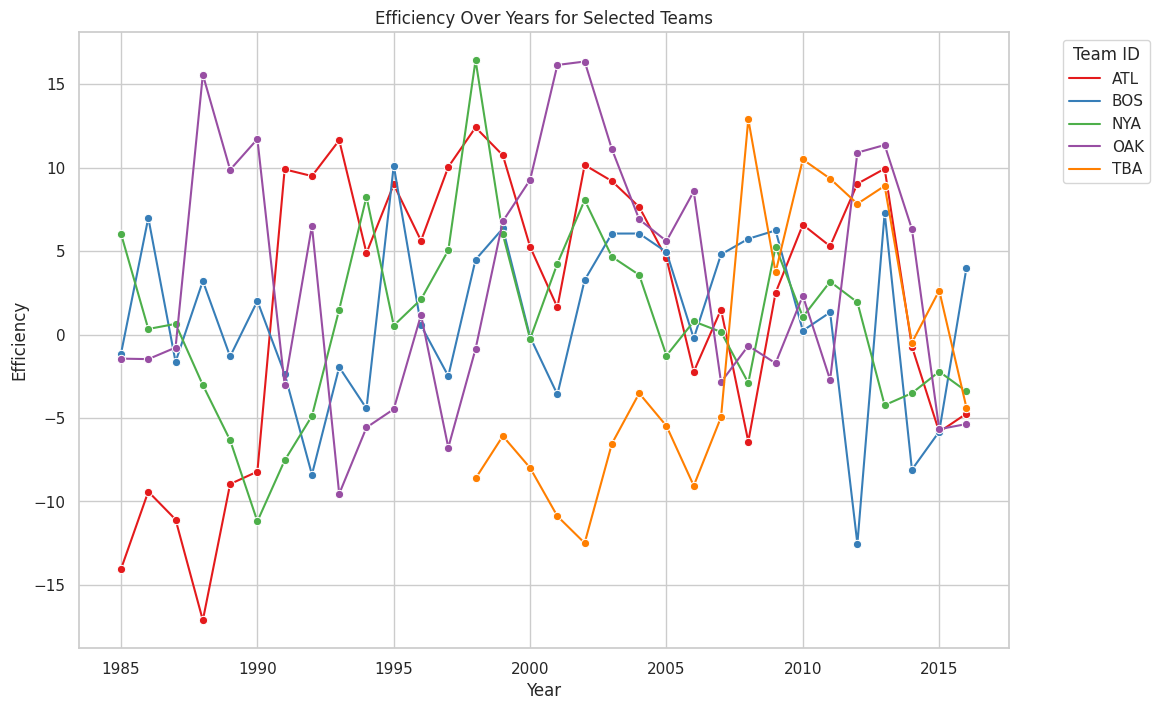

In [19]:
# Filter data for specific teams
selected_teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
filtered_df = merge_df[merge_df['teamID'].isin(selected_teams)]

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a line plot for efficiency over years
plt.figure(figsize=(12, 8))
sns.lineplot(x='yearID', y='efficiency', hue='teamID', data=filtered_df, marker='o', palette='Set1')

# Add labels and title
plt.title('Efficiency Over Years for Selected Teams')
plt.xlabel('Year')
plt.ylabel('Efficiency')

# Show legend
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

**Question 4**

*What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3? How good was Oakland's efficiency during the Moneyball period?*

Analysis of questions 2 and 3 reveals that the New York Yankees (NYA) made substantial financial investments in their team, establishing dominance during periods 3 through 5. However, a closer examination of the efficiency chart unveils a nuanced perspective. NYA's investing efficiency reached its zenith in 1996, experienced fluctuations, and has been on a downward trajectory since. Comparatively, the Oakland Athletics (OAK) showcased a different pattern, with their efficiency peaking during the years 2000 to 2005—a period famously depicted in the movie and book.